In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from tqdm import tqdm

In [2]:
nmssmDF = pd.read_csv('/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/sampling_points_expressions_1703p07800.csv')
nmssmDF.head(3)

,tb,M,mA,n,lam,s11,s22,s33
0,1,1000,0,0,0.01,-5648.544306,10478.717318,5949.583101
1,1,1000,0,0,0.11,-74672.292979,78550.099464,6901.949628
2,1,1000,0,0,0.21,-143742.759282,148582.004552,5940.510843


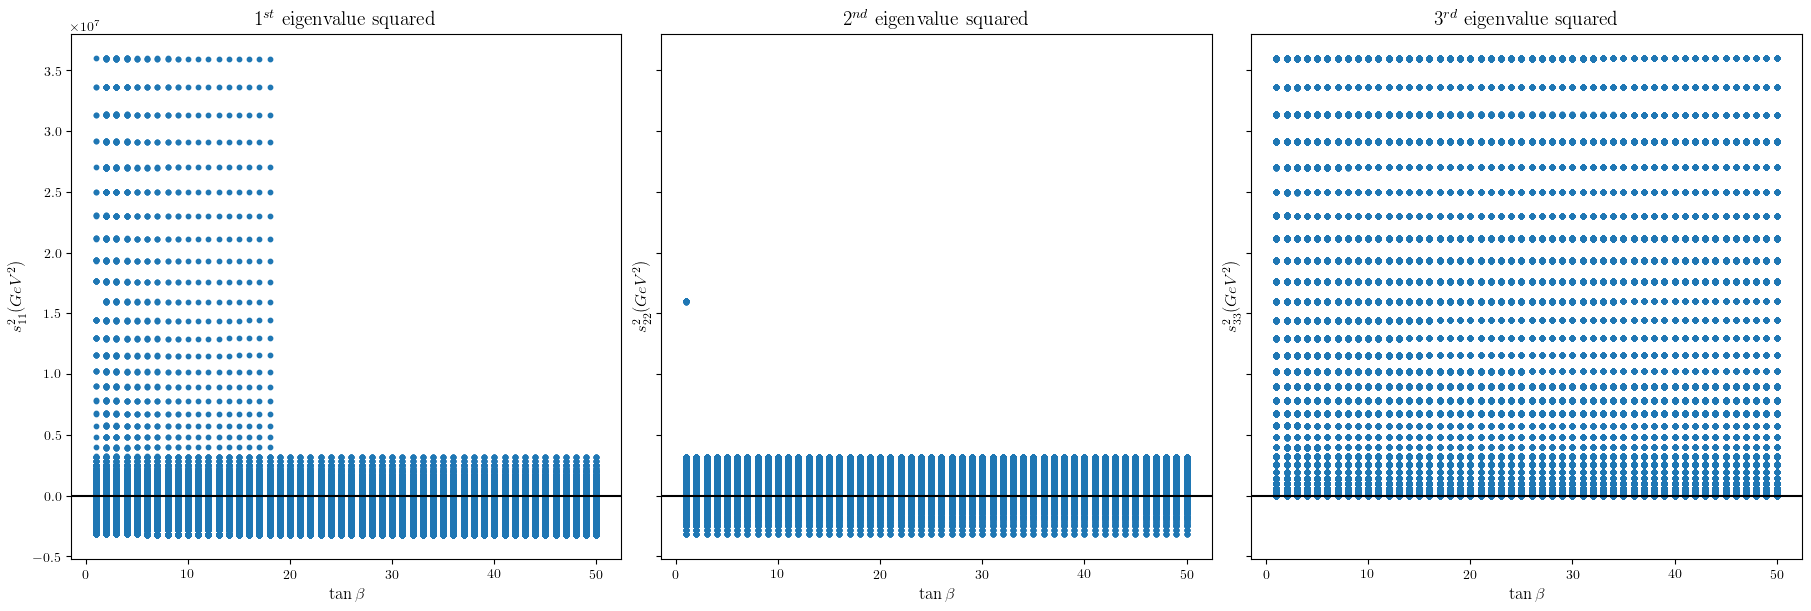

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

scatter1 = axes[0].scatter(nmssmDF['tb'], nmssmDF['s11'],s=10)
axes[0].set_title(r'$1^{st}$ eigenvalue squared', fontsize=14)
axes[0].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2 (GeV^2)$', fontsize=12)
axes[0].axhline(y=0, color='black')

scatter2 = axes[1].scatter(nmssmDF['tb'], nmssmDF['s22'],s=10)
axes[1].set_title(r'$2^{nd}$ eigenvalue squared', fontsize=14)
axes[1].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[1].set_ylabel(r'$s_{22}^2 (GeV^2)$', fontsize=12)
axes[1].axhline(y=0, color='black')

scatter3 = axes[2].scatter(nmssmDF['tb'], nmssmDF['s33'],s=10)
axes[2].set_title(r'$3^{rd}$ eigenvalue squared', fontsize=14)
axes[2].set_xlabel(r'$\tan \beta$', fontsize=12)
axes[2].set_ylabel(r'$s_{33}^2 (GeV^2)$', fontsize=12)
axes[2].axhline(y=0, color='black')

plt.show()


In [33]:
posDF = nmssmDF[(nmssmDF['s11'] >= 0) & (nmssmDF['s22'] >= 0) & (nmssmDF['s33'] >= 0)]
posDF.head(2)

,tb,M,mA,n,lam,s11,s22,s33
1400,1,1000,4000,0,0.01,3505.323463,1.600727e+07,3.0258
1401,1,1000,4000,0,0.11,3868.419441,1.600691e+07,366.1218


- From this dataframe we get that only for $tan \beta =1$ or $2$ we have all three eigenvalues positive. We also get that for $\tan \beta = 1$ we only have $m_A = 4000GeV$ and for $\tan \beta =2$ we only have $m_A=5000GeV$. 

In [74]:
np.unique(posDF[(posDF['tb'] == 2)]['lam'])

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

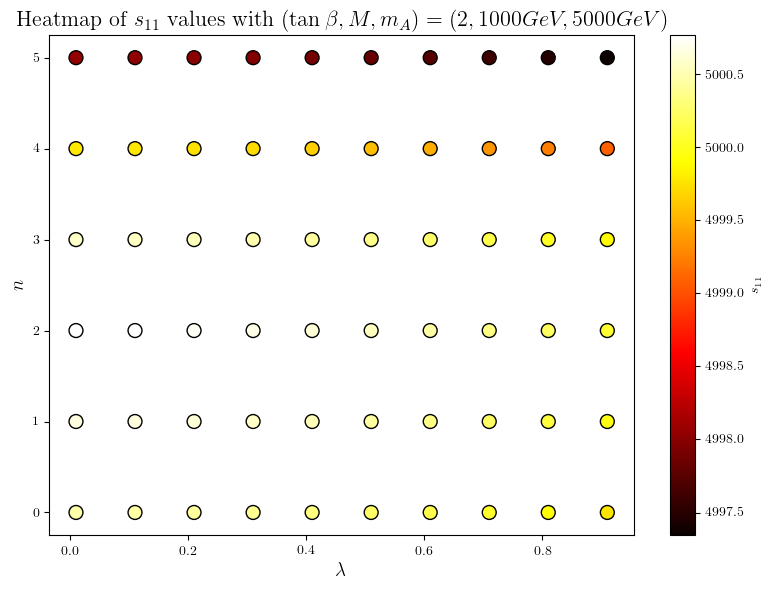

In [75]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==5000)]['lam'], posDF[(posDF['mA']==5000)]['n'], c=np.sqrt(posDF[(posDF['mA']==5000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(2,1000GeV, 5000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

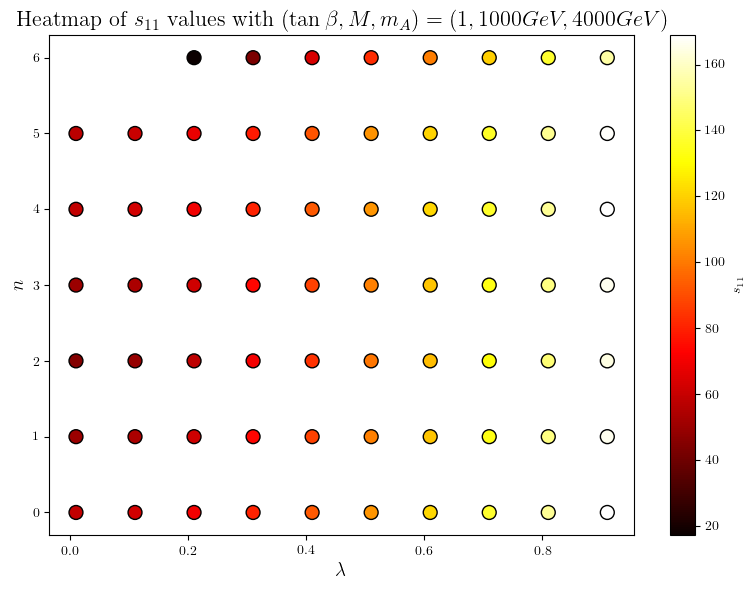

In [76]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(posDF[(posDF['mA']==4000)]['lam'], posDF[(posDF['mA']==4000)]['n'], c=np.sqrt(posDF[(posDF['mA']==4000)]['s11']), cmap='hot', s=100, edgecolor='k')
plt.colorbar(scatter, label=r'$s_{11}$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$n$', fontsize=14)
plt.title(r'Heatmap of $s_{11}$ values with $(\tan\beta , M, m_A)=(1,1000GeV, 4000GeV)$', fontsize=16)

plt.tight_layout()
plt.show()

- Plot eigenvalues as functions of $m_A$ keeping everything else fixed.

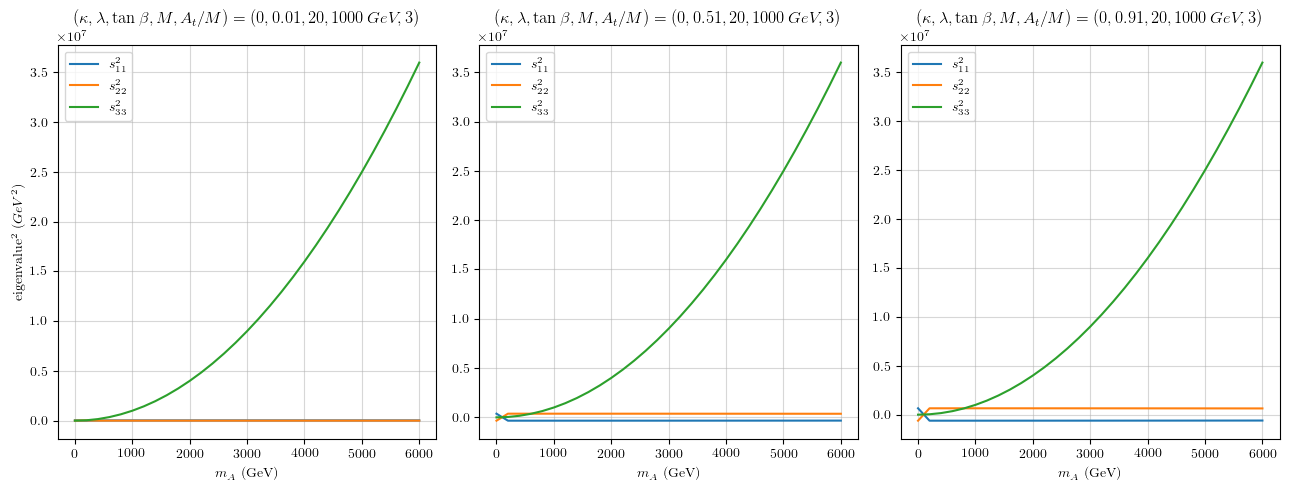

In [90]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_xlabel(r'$m_A$ (GeV)')
ax1.set_ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$')
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.01,20,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_xlabel(r'$m_A$ (GeV)')
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_xlabel(r'$m_A$ (GeV)')
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()


# Adjust layout
plt.tight_layout()

# Save and show the figure
#plt.savefig("", format="pdf", bbox_inches="tight")
plt.show()


In [94]:
# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$', linestyle='--')
# plt.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.01,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()


# #Plot
# plt.figure(figsize=(8, 6))
# plt.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
# plt.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
# plt.xlabel(r'$m_A$', fontsize=12)
# plt.ylabel(r'$\rm eigenvalue^2$ $(GeV^2)$', fontsize=12)
# plt.axhline(y=0, color='black', linestyle='--')
# plt.title(r'1-loop result from 1703.07800 for $( \kappa , \lambda , \tan \beta , M, A_t ) = (0,0.51,20,1000 \,GeV, 3000 \, GeV)$', fontsize=16)
# plt.grid()
# plt.xlim(0,500)
# plt.ylim(-1e+5,1e+5)
# plt.legend()
# plt.tight_layout()
# plt.show()

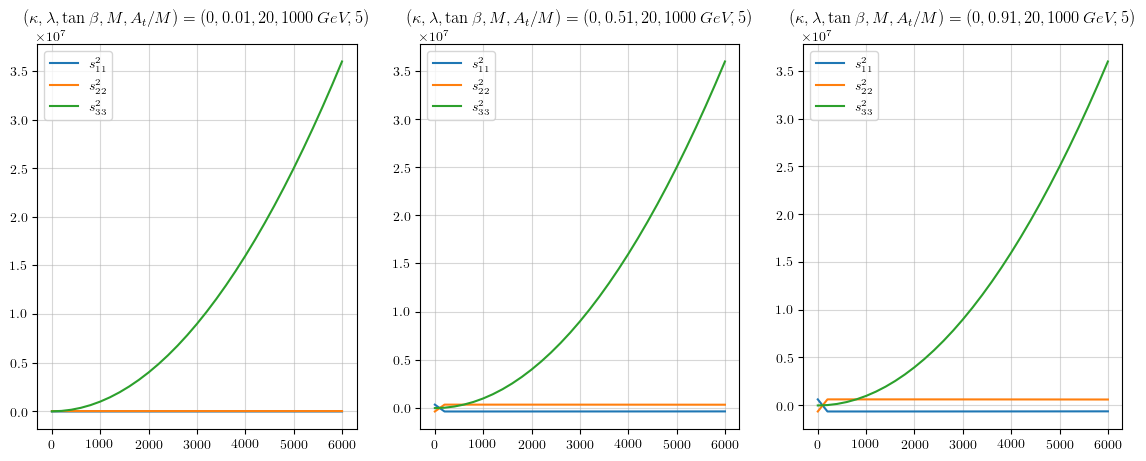

In [93]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 20) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 5) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,20,1000 \,GeV, 5)$', fontsize=12)
ax1.legend()

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,20,1000 \,GeV, 5)$', fontsize=12)
ax2.legend()

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,20,1000 \,GeV, 5)$', fontsize=12)
ax3.legend()

(-1000000.0, 1000000.0)

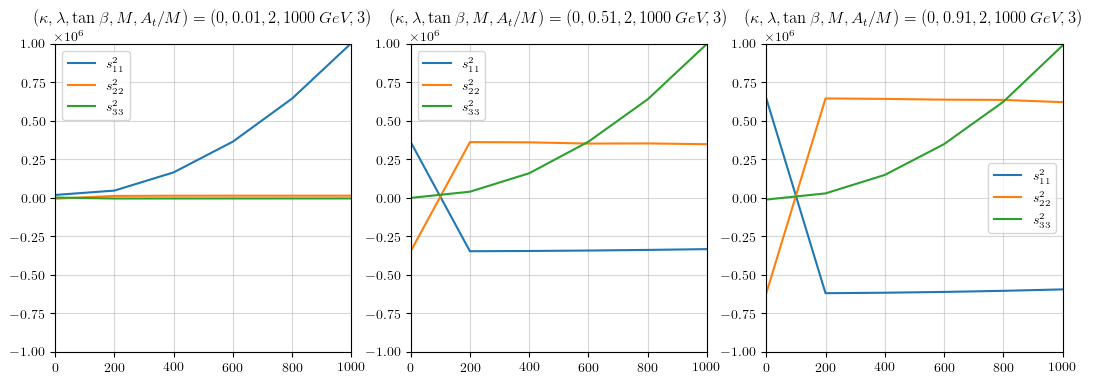

In [86]:
auxDF0p01 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['tb'] == 2) &(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

# Create a figure with three subplots (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))  # Adjust figsize as needed

## 1st panel 
ax1.plot(auxDF0p01['mA'], auxDF0p01['s11'], label=r'$s_{11}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s22'], label=r'$s_{22}^2$')
ax1.plot(auxDF0p01['mA'], auxDF0p01['s33'], label=r'$s_{33}^2$')
ax1.grid(alpha=0.5)
ax1.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t /M ) = (0,0.01,2,1000 \,GeV, 3)$', fontsize=12)
ax1.legend()
ax1.set_xlim(0,1000)
ax1.set_ylim(-1e+6,1e+6)

## 2nd panel
ax2.plot(auxDF0p51['mA'], auxDF0p51['s11'], label=r'$s_{11}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s22'], label=r'$s_{22}^2$')
ax2.plot(auxDF0p51['mA'], auxDF0p51['s33'], label=r'$s_{33}^2$')
ax2.grid(alpha=0.5)
ax2.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.51,2,1000 \,GeV, 3)$', fontsize=12)
ax2.legend()
ax2.set_xlim(0,1000)
ax2.set_ylim(-1e+6,1e+6)

## 3rd panel
ax3.plot(auxDF0p91['mA'], auxDF0p91['s11'], label=r'$s_{11}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s22'], label=r'$s_{22}^2$')
ax3.plot(auxDF0p91['mA'], auxDF0p91['s33'], label=r'$s_{33}^2$')
ax3.grid(alpha=0.5)
ax3.set_title(r' $( \kappa , \lambda , \tan \beta , M, A_t/M ) = (0,0.91,2,1000 \,GeV, 3)$', fontsize=12)
ax3.legend()
ax3.set_xlim(0,1000)
ax3.set_ylim(-1e+6,1e+6)



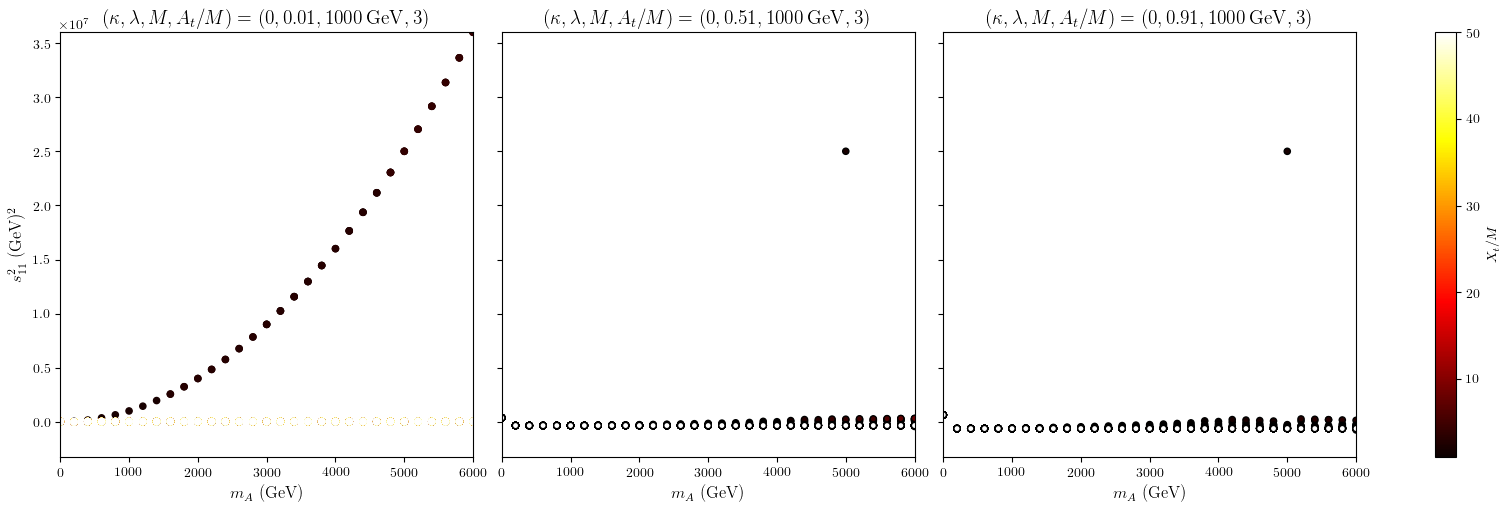

In [130]:
auxDF0p01 = nmssmDF[(nmssmDF['lam'] == 0.01) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p51 = nmssmDF[(nmssmDF['lam'] == 0.51) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]
auxDF0p91 = nmssmDF[(nmssmDF['lam'] == 0.91) &(nmssmDF['n'] == 3) &(nmssmDF['M'] == 1000)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Plot each heatmap on its respective axis
scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s22'], c=auxDF0p01['tb'], cmap='hot', s=20)
# scatter1 = axes[0].scatter(auxDF0p01['mA'], auxDF0p01['s33'], c=auxDF0p01['tb'], cmap='hot', s=20)
axes[0].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.01,1000 \, \rm GeV, 3)$', fontsize=14)
axes[0].set_xlabel(r'$m_A$ (GeV) ', fontsize=12)
axes[0].set_ylabel(r'$s_{11}^2$ $(\rm GeV)^2$', fontsize=12)
axes[0].set_xlim(nmssmDF['mA'].min(), nmssmDF['mA'].max())
axes[0].set_ylim(nmssmDF['s11'].min(), nmssmDF['s11'].max())


scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s11'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s22'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter2 = axes[1].scatter(auxDF0p51['mA'], auxDF0p51['s33'], c=auxDF0p51['tb'], cmap='hot',s=20,  edgecolor='k')

axes[1].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.51,1000 \, \rm GeV, 3)$', fontsize=14)
axes[1].set_xlabel(r'$m_A$ (GeV)', fontsize=12)

scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s11'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s22'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')
# scatter3 = axes[2].scatter(auxDF0p91['mA'], auxDF0p91['s33'], c=auxDF0p91['tb'], cmap='hot',s=20,  edgecolor='k')

axes[2].set_title(r'$(\kappa, \lambda, M, A_t/M) = (0,0.91,1000 \, \rm GeV, 3)$', fontsize=14)
axes[2].set_xlabel(r'$m_A$ (GeV)', fontsize=12)


# Add a single colorbar for all plots
fig.colorbar(scatter1, ax=axes, location='right', label=r'$X_t/M$')
#plt.ylim(0.1,1)
# Display the plot
plt.show()



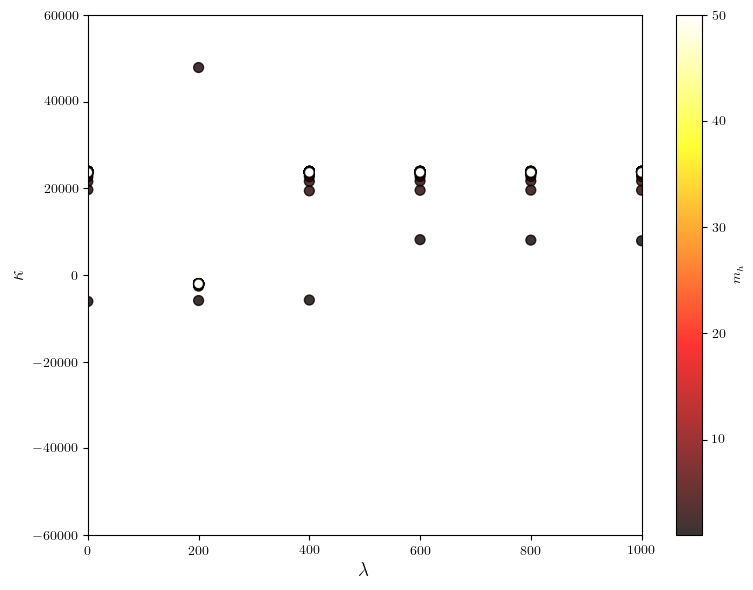

In [127]:
# heat map without interpolation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(auxDF0p01['mA'], auxDF0p01['s11'], c=auxDF0p01['tb'], cmap='hot',s=50,  edgecolor='k', alpha=0.8)
plt.colorbar(scatter, label=r'$m_h$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$\kappa$', fontsize=14)
plt.ylim(-60e+3,60e+3)
plt.xlim(0,1000)
plt.tight_layout()
plt.show()